# Project Group - 

Members: Tieme van Hijum, Emma van den Brink, Sil Havinga

Student numbers: 4923588, 5136008, 4730321

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

# Introduction

Access to healthcare is a fundamental right in modern society. Every resident should be within reach of timely medical assistance. In the 1960s, a standard was established in the Netherlands stipulating that every citizen should be able to reach a hospital within 45 minutes in the event of an emergency (Skipr Redactie, 2013). This standard breaks down into three key components: 15 minutes for emergency response time, 5 minutes for care at the scene, and 25 minutes for transport to a hospital. However, this target has been scrutinized, with reports indicating that the threshold is rarely met in some regions, while it is occasionally missed in others (Centraal Bureau voor de Statistiek, 2009).

This study explores the development over time in the proportion of the population that falls outside this maximum distance to a hospital. Using data modeling and quantitative research, this investigation will analyze the trends in hospital accessibility across different regions of the Netherlands. Additionally, it aims to provide insights into how changes in population density, hospital location, and infrastructure impact the ability to meet the 45-minute target, with implications for future policy decisions.

# Method

The structure of this document is as follows: first, several regions of The Netherlands are shown in a map. Data is available for these regions, such as the number of people living there and their average distance to a hospital. Next, a color scheme is added to show how far away the nearest hospital is...... !!!!! CHECK THIS AND FINISH THE STRUCTURE OF THE DOCUMENT !!!!


MOVE THE INFORMATION BELOW TO THE CELL AT THE BOTOM???

Data Sources: 
 - CBS: Per municipality, district and neighborhood; proximity to hospital and population. https://www.cbs.nl/nl-nl/reeksen/publicatie/nabijheidsstatistieken-per-wijk-buurt
 - Optionally, data for hospital locations over time

Time Scale:
 - Data is available from 2007 until 2022, but the geography has changed over that time.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib

In [58]:
#Setting up an empty dictionary of all datasets, so each dataset can be individually called when needed
dataset = dict()
years = range(2007,2023)
for year in years:
    #First, loading in the shapefile
    dataset[year] = gpd.read_file(f'AreaGeodata/Wijken{year}.shp')
    #Second, setting the areacode as the index, for convention
    dataset[year] = dataset[year].set_index('statcode')
    #Third, the proximities per area are loaded separately, sorting by areacode so it's guaranteed that
    #the indexes match
    proximities = pd.read_csv(f'ProximitiesPerArea/Proximities{year}.csv',
                              index_col = 'WijkenEnBuurten').sort_values(by = 'WijkenEnBuurten')
    #Lastly, adding the proximities per area as a new column to the dataset
    dataset[year]['AfstandTotZiekenhuis_11'] = proximities['AfstandTotZiekenhuis_11'].tolist()

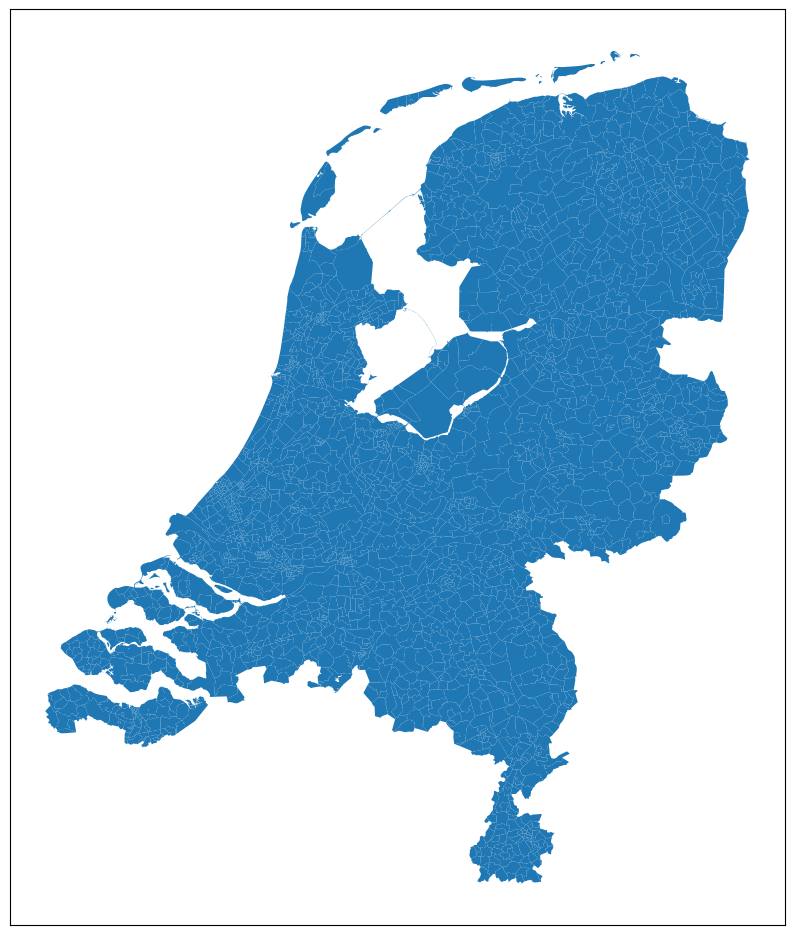

In [69]:
#An example of a plot of just the areas
dataset[2007].plot(figsize = (10,30))
plt.xticks([])
plt.yticks([]);

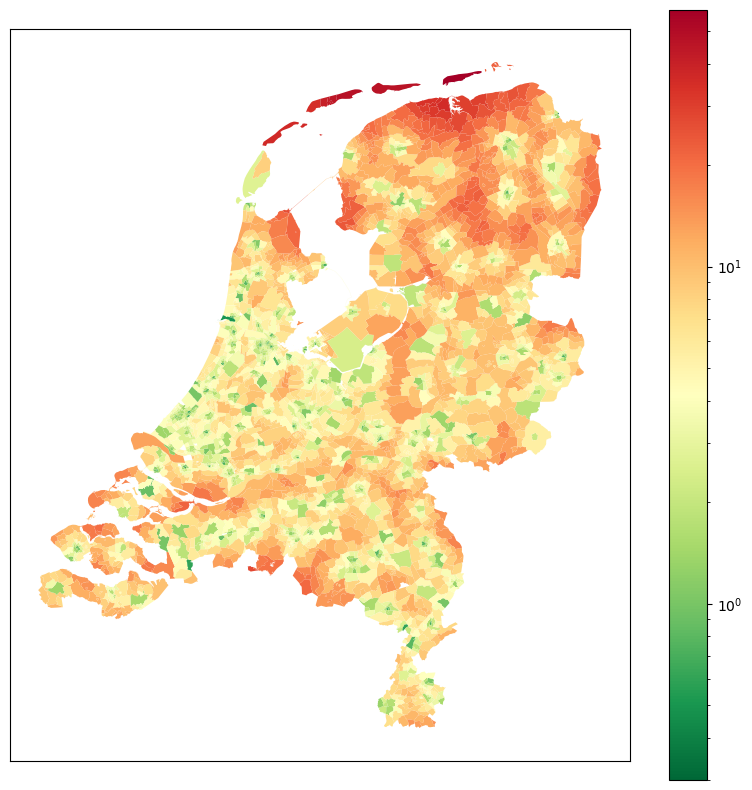

In [70]:
#Example of how to plot the proximity data on a logarithmic scale to make visualisation better
dataset[2022].plot(figsize = (10,10), column='AfstandTotZiekenhuis_11', legend = True, cmap='RdYlGn_r',
                   norm=matplotlib.colors.LogNorm(vmin=dataset[2022].AfstandTotZiekenhuis_11.min(),
                                                  vmax=dataset[2022].AfstandTotZiekenhuis_11.max(),
                                                  clip = True))
plt.xticks([])
plt.yticks([]);

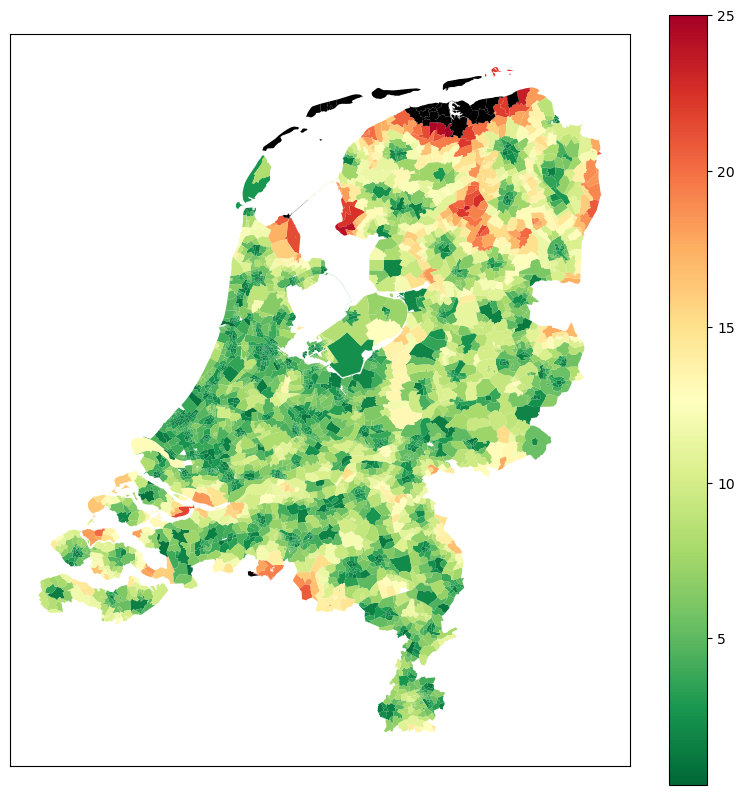

In [71]:
#Example of a plot where every value bigger than 25 km is made black, this makes the map easier to read
fig, ax = plt.subplots(figsize = (10,10))

dataset[2022][dataset[2022]['AfstandTotZiekenhuis_11'] < 25].plot(ax=ax, vmax=25,
                                                                  column='AfstandTotZiekenhuis_11',
                                                                  legend=True, cmap='RdYlGn_r')
dataset[2022][dataset[2022]['AfstandTotZiekenhuis_11'] >= 25].plot(ax=ax, color='black', legend=True)
plt.xticks([])
plt.yticks([])

plt.show();

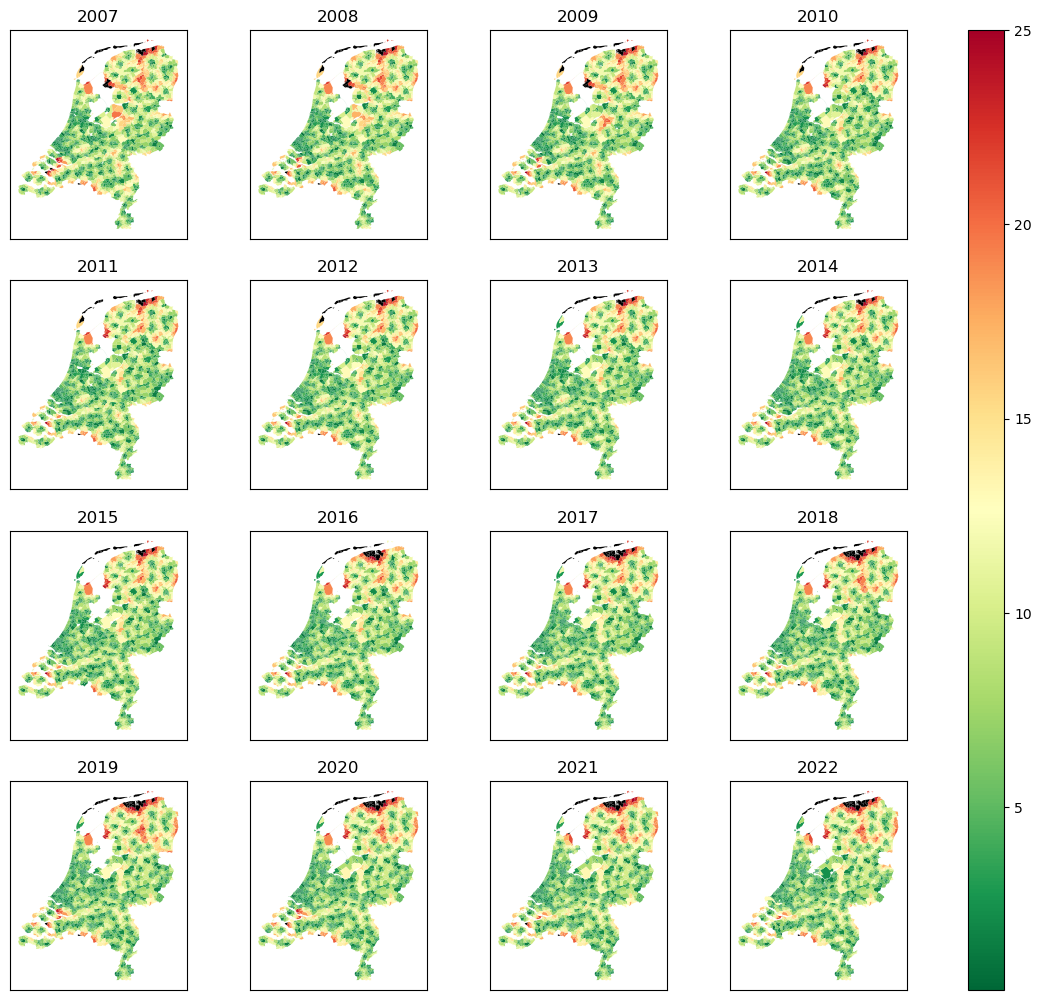

In [102]:
fig, axs = plt.subplots(nrows=4, ncols=4, sharex='col', sharey='row', figsize = (12,12))

for i in range(0,4):
    for j in range(0,4):
        dataset[2007 + i*4 + j][dataset[2007 + i*4 + j]\
               ['AfstandTotZiekenhuis_11'] < 25].plot(ax=axs[i][j], vmax=25,
                                                      column='AfstandTotZiekenhuis_11',
                                                      legend=False, cmap='RdYlGn_r')
        dataset[2007 + i*4 + j][dataset[2007 + i*4 + j]\
               ['AfstandTotZiekenhuis_11'] >= 25].plot(ax=axs[i][j], color='black', legend=False)
        axs[i][j].set_title(2007 + i*4 + j)
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])
        
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=None)
im = plt.gca().get_children()[0]
cax = fig.add_axes([0.925,0.1,0.03,0.8]) 
fig.colorbar(im, cax=cax)        
plt.show();

# Conclusion

bla bla bla

# Discussion

bla bla bla

# References

Centraal Bureau voor de Statistiek. (2009, 12 augustus). Meeste Nederlanders wonen binnen 5 kilometer van ziekenhuis. Centraal Bureau Voor de Statistiek. https://www.cbs.nl/nl-nl/nieuws/2009/33/meeste-nederlanders-wonen-binnen-5-kilometer-van-ziekenhuis

Skipr Redactie. (2013, 22 oktober). De 45-minutengrens is niet meer van deze tijd. - Skipr. Skipr. https://www.skipr.nl/blog/de-45-minutengrens-is-niet-meer-van-deze-tijd/#:~:text=Ergens%20in%20de%20zestiger%20jaren,Hiervan%20is%2015%20min.

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Tieme van Hijum**:

**Emma van den Brink**:

**Sil Havinga**:

# Data Used

# Data Pipeline